
reward – The money earned by the agent as commission for selling the insurance policy.

claim_status – Whether an insurance claim was approved (1) or not approved (0). This is only in the training data (used to predict future claims).

person_gender – The gender of the person who bought the insurance (e.g., Male/Female/Other).

entity_type – The type of company or entity that sold the insurance (e.g., individual agent, large agency, online platform).

**!!! channel** – How the insurance was sold (e.g., online, phone, in-person).

support_interactions – How many times the customer contacted customer service for help.

agent_id – A unique ID for the agent who sold the policy.

customer_score – A rating (0 to 1) representing how good the customer is (e.g., based on past behavior).

**Combine as nominal data !!!** entity_a – A code identifying the specific agency that sold the policy.

**combine as orginal** person_age – The age of the insured person.

**Combine as nominal data !!!** location – The place where the insured trip is happening (e.g., France, USA).

revenue – The total money made from the insurance sale (negative if discounts were given).

product_id – The name or type of insurance product (e.g., "Gold Travel Insurance").

trip_length – How many days the insured trip will last

# EDA of insurance.csv file for classification

In [2]:
!git clone https://github.com/AliaksandraLabko/ML.git

Cloning into 'ML'...


In [3]:
%cd ML

C:\Users\stran\AppData\Local\Programs\Microsoft VS Code\ML


C:\Users\stran\AppData\Roaming\Python\Python313\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
# import all the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import pickle
import os
from sklearn.preprocessing import StandardScaler



In [9]:
print("Current directory:", os.getcwd())  # Should end with '.../ML'
print("Files in directory:", os.listdir())

Current directory: C:\Users\stran\AppData\Local\Programs\Microsoft VS Code\ML
Files in directory: ['.git', 'insurance_test.csv', 'insurance_train.csv', 'ML02_data_preparation.ipynb', 'README.md']


In [96]:
INS_test = pd.read_csv("insurance_test.csv")

In [97]:
# lets import data
INS = pd.read_csv("insurance_train.csv")
#INS_test = pd.read_csv("insurance_test.csv")

INS.head(10) # Shows the first 10 rows of the dataset

,reward,claim_status,person_gender,entity_type,channel,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.284509,50b3e71e,51,united states,105.459587,SecurePlan Flex,21
1,18.428627,0,9b2d5b46,type_a,web,0,agt_0001,0.207538,96d6c6df,32,spain,30.433459,DriveSafe Rental Addon,6
2,0.000000,0,9b2d5b46,type_a,web,1,agt_0004,0.300461,50b3e71e,38,new zealand,78.728474,TripGuard Cancel,84
3,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.132404,50b3e71e,30,thailand,17.146843,TripGuard Cancel,39
4,0.000000,0,9b2d5b46,type_a,web,2,agt_0004,0.070443,50b3e71e,37,viet nam,10.476416,TripGuard Cancel,48
5,41.613029,0,9b2d5b46,type_a,web,1,agt_0001,0.288280,96d6c6df,30,australia,68.698795,DriveSafe Rental Addon,59
6,46.687680,0,9b2d5b46,type_a,web,1,agt_0001,0.140587,96d6c6df,23,croatia,79.426319,DriveSafe Rental Addon,37
7,0.000000,0,9b2d5b46,type_a,web,1,agt_0004,0.189089,50b3e71e,38,malaysia,20.088002,SecurePlan OneWay,18
8,10.186860,0,f67ab10a,type_b,web,1,agt_0002,0.097472,7b5dbb09,35,indonesia,28.631036,TravelShield Basic,10
9,9.335454,0,f67ab10a,type_b,web,2,agt_0005,0.083457,99ede4e4,28,singapore,37.609526,TravelShield Core,138


In [12]:
# the structure of the dataset
INS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56993 entries, 0 to 56992
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reward                56993 non-null  float64
 1   claim_status          56993 non-null  int64  
 2   person_gender         56993 non-null  object 
 3   entity_type           56993 non-null  object 
 4   channel               56993 non-null  object 
 5   support_interactions  56993 non-null  int64  
 6   agent_id              56993 non-null  object 
 7   customer_score        56993 non-null  float64
 8   entity_a              56993 non-null  object 
 9   person_age            56993 non-null  int64  
 10  location              56993 non-null  object 
 11  revenue               56993 non-null  float64
 12  product_id            56993 non-null  object 
 13  trip_length           56993 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 6.1+ MB


In [23]:
# Basic statistics for numerical features
print(INS.describe())

# Value counts for categorical features
cat_cols = ['person_gender', 'entity_type', 'channel', 'agent_id', 'entity_a', 'location', 'product_id']
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(INS[col].value_counts())  # Top 10 categories

             reward  claim_status  support_interactions  customer_score  \
count  56993.000000  56993.000000          56993.000000    56993.000000   
mean       9.794976      0.014633              1.093941        0.189540   
std       19.791119      0.120081              0.923113        0.080641   
min        0.000000      0.000000              0.000000        0.000000   
25%        0.000000      0.000000              0.000000        0.136389   
50%        0.000000      0.000000              1.000000        0.181041   
75%       11.336612      0.000000              2.000000        0.230836   
max      282.073580      1.000000              6.000000        1.000000   

         person_age       revenue   trip_length  
count  56993.000000  56993.000000  56993.000000  
mean      39.697261     40.750070     49.234888  
std       12.603433     48.749221     98.659469  
min       18.000000   -406.642669      1.000000  
25%       34.000000     18.246389      9.000000  
50%       36.000000     

Channel has near zero variance, i'd remove this value 
Combine location that is under 1% var into 'other'

# Missing values

Lets check the existence of missing values and apply simple imputation for categorical and/or numerical variables.

In [24]:
INS.isnull().sum()

reward                  0
claim_status            0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
dtype: int64

as we don't have any missing values, we can proceed further 

In [54]:
INS_test.isnull().sum()

reward                  0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
dtype: int64

# Distributions of nominal variables

Lets check the frequencies of individual levels of all the nominal variables.

Extremely small counts of single levels are problematic as they might be very rare cases which a model will not be able to learn how they influence the sale price.

Therefore we will replace all the levels which have no more than 569 observations (ca. 1% of the total sample) with the label "other".

**IMPORTANT!** Remember that for a nominal variable we can combine any levels together, while for an ORDINAL feature ONLY neighboring levels can be combined!



In [11]:
# Lets check the frequencies of individual levels of all the nominal variables

# Based on the information about the dataset we can list all nominal variables

nominal_variables = ['person_gender', 'entity_type', 'channel', 'agent_id', 'entity_a', 'location', 'product_id']

# Loop through each nominal variable
for var in nominal_variables:
    # Get the value counts for each category in the variable
    value_counts = INS[var].value_counts()
    print("\n")
    print(INS[var].value_counts(dropna = False))



person_gender
9b2d5b46    40643
08f27188     8379
f67ab10a     7971
Name: count, dtype: int64


entity_type
type_a    41297
type_b    15696
Name: count, dtype: int64


channel
web       56019
retail      974
Name: count, dtype: int64


agent_id
agt_0004    31663
agt_0001     7713
agt_0005     7444
agt_0002     5683
agt_0008      949
agt_0006      672
agt_0007      651
agt_0013      612
agt_0015      456
agt_0003      356
agt_0009      297
agt_0011      175
agt_0000       89
agt_0014       85
agt_0010       77
agt_0012       71
Name: count, dtype: int64


entity_a
50b3e71e    31663
96d6c6df     7713
99ede4e4     7444
7b5dbb09     5683
b5e4bb23      949
1e089e14      672
c4e0e538      651
f94f3b95      612
5d630515      456
d1e2553c      356
be00235a      297
aba20dea      175
0c4e727c       89
3db4b215       85
bc07f34c       77
bb3ad25f       71
Name: count, dtype: int64


location
singapore                                 11942
malaysia                                   5355
thailan

In [12]:
# Lets replace all the levels which have no more than 569 observations (ca. 1% of the sample size) with the label "other"

# IMPORTANT! Remember that for a nominal variable we can combine any levels together,
# while for an ORDINAL feature ONLY neighboring levels can be combined!

# Loop through each nominal variable
for var in nominal_variables:
    # Get the value counts for each category in the variable
    value_counts = INS[var].value_counts()
    # Identify the levels with counts not higher than 569
    levels_to_replace = value_counts[value_counts <= 569].index
    # Replace these levels with "Other"
    INS[var] = INS[var].replace(levels_to_replace, "Other")

In [13]:
# Lets check the frequencies of nominal variables again
for var in nominal_variables:
    # Get the value counts for each category in the variable
    value_counts = INS[var].value_counts()
    print("\n")
    print(INS[var].value_counts(dropna = False))

# Looks like the problem with small counts has been solved



person_gender
9b2d5b46    40643
08f27188     8379
f67ab10a     7971
Name: count, dtype: int64


entity_type
type_a    41297
type_b    15696
Name: count, dtype: int64


channel
web       56019
retail      974
Name: count, dtype: int64


agent_id
agt_0004    31663
agt_0001     7713
agt_0005     7444
agt_0002     5683
Other        1606
agt_0008      949
agt_0006      672
agt_0007      651
agt_0013      612
Name: count, dtype: int64


entity_a
50b3e71e    31663
96d6c6df     7713
99ede4e4     7444
7b5dbb09     5683
Other        1606
b5e4bb23      949
1e089e14      672
c4e0e538      651
f94f3b95      612
Name: count, dtype: int64


location
singapore                    11942
Other                         6681
malaysia                      5355
thailand                      5303
china                         4345
australia                     3323
indonesia                     3107
united states                 2299
philippines                   2240
hong kong                     2174
india

# Near-zero variance

What can be still problematic however is the **strong concentration of variable values in one level** (issue called: **near-zero variance**) - such variables have little predictive power and can be omitted in modelling.

To identify variables that have a small variance one can use a measure based on the ratio of the most frequent and second most frequent values (**frequency ratio**).

For well diversified variables it will take a value close to 1, and a very high value for unbalanced data.

Another useful measure is the **percent of unique values**: `100 * (number of unique values) / (number of observations)`

It is close to zero for data that is not very diversified.

If the "frequency ratio" is greater than some threshold, and the "percent of unique values" is less than a certain limit value, we can assume that the variable has a variance close to 0 and can be potentially omitted.

Lets define a function which will check it with the threshold 95/5 for the **frequency ratio** and 10 for the **percent of unique values**.


In [14]:
# lets define a function checking near-zero variance
def near_zero_var(df, freq_cut=95/5, unique_cut=10):
    """
    Identifies columns with near-zero variance in a DataFrame and calculates indicators.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - freq_cut (float): Threshold for the frequency ratio (default = 95/5).
    - unique_cut (int): Threshold for the unique value ratio (default = 10).

    Returns:
    - pd.DataFrame: A sorted DataFrame containing:
        - variable: Column name
        - freq_ratio: Ratio of the most common value to the second most common value
        - unique_ratio: Ratio of unique values to total observations
        - high_freq_ratio: Binary indicator (1 if freq_ratio > freq_cut)
        - low_unique_ratio: Binary indicator (1 if unique_ratio < unique_cut)
    """
    results = []

    for col in df.columns:
        # Get the value counts
        counts = df[col].value_counts()

        # Calculate freq_ratio
        if len(counts) > 1:
            freq_ratio = counts.iloc[0] / counts.iloc[1]
        else:
            freq_ratio = float('inf')  # Only one unique value

        # Calculate unique_ratio
        unique_ratio = len(counts) / len(df)

        # Determine binary indicators
        high_freq_ratio = int(freq_ratio > freq_cut)
        low_unique_ratio = int(unique_ratio < unique_cut)

        # Append results
        results.append({
            'variable': col,
            'freq_ratio': freq_ratio,
            'unique_ratio': unique_ratio,
            'high_freq_ratio': high_freq_ratio,
            'low_unique_ratio': low_unique_ratio
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort by 'high_freq_ratio' (descending) and 'low_unique_ratio' (ascending)
    results_df = results_df.sort_values(by=['freq_ratio', 'unique_ratio'], ascending=[False, True])

    return results_df


In [15]:
# and apply it to ALL VARIABLES from our dataset

INS_nzv = near_zero_var(INS, freq_cut=95/5, unique_cut=10)

INS_nzv[(INS_nzv['low_unique_ratio'] == 1) & (INS_nzv['high_freq_ratio'] == 1)]

,variable,freq_ratio,unique_ratio,high_freq_ratio,low_unique_ratio
0,reward,31748.000000,0.442967,1,1
11,revenue,1694.000000,0.970295,1,1
7,customer_score,132.000000,0.997701,1,1
1,claim_status,67.336930,0.000035,1,1
4,channel,57.514374,0.000035,1,1


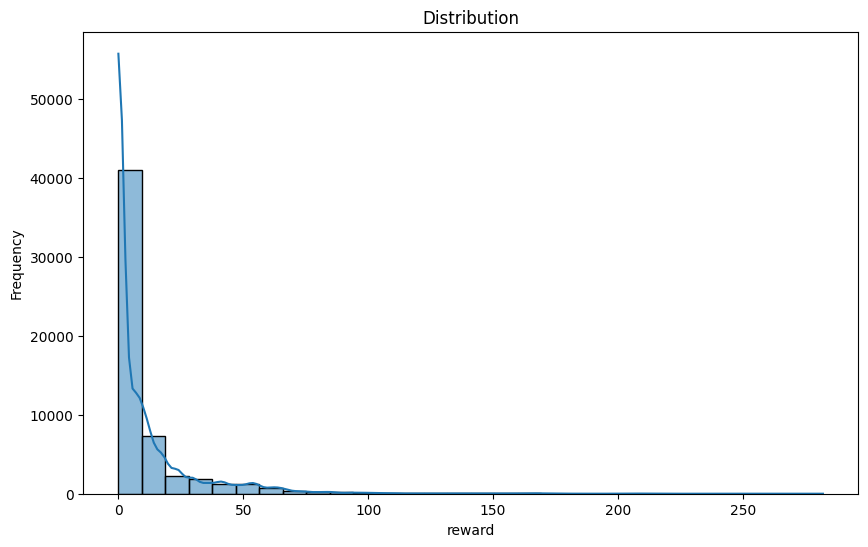

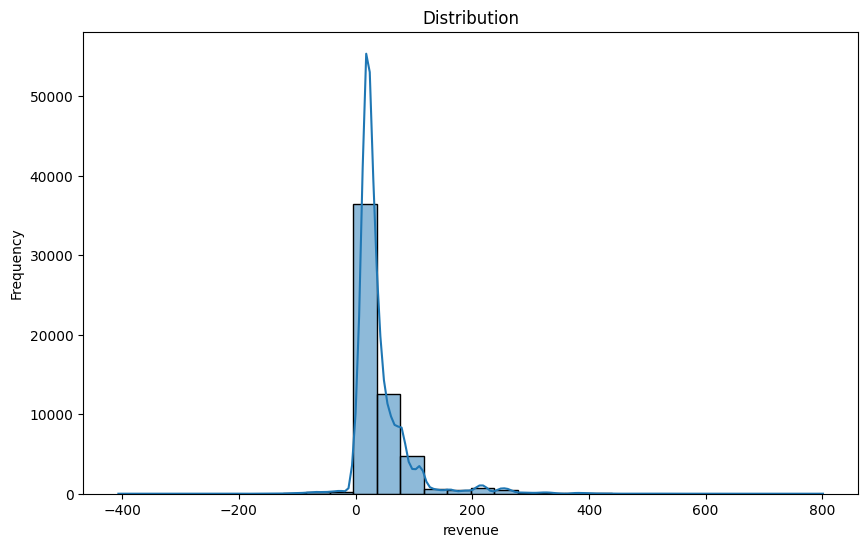

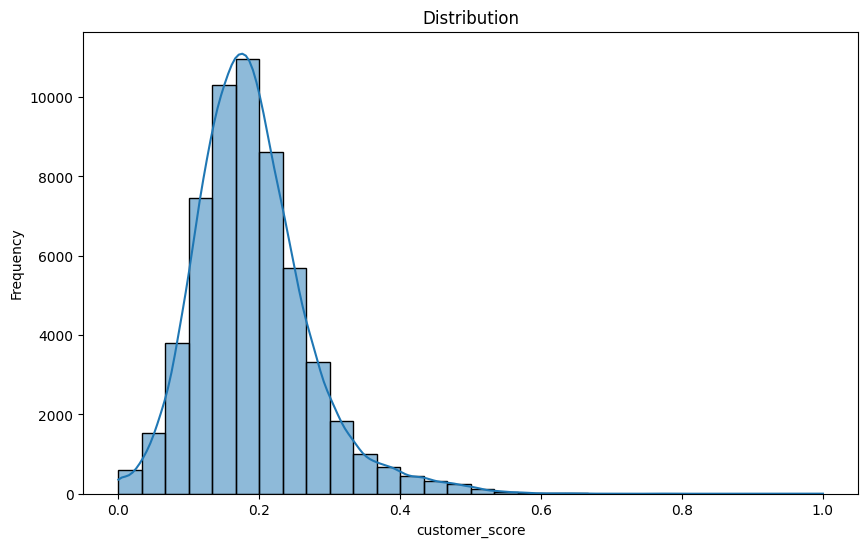

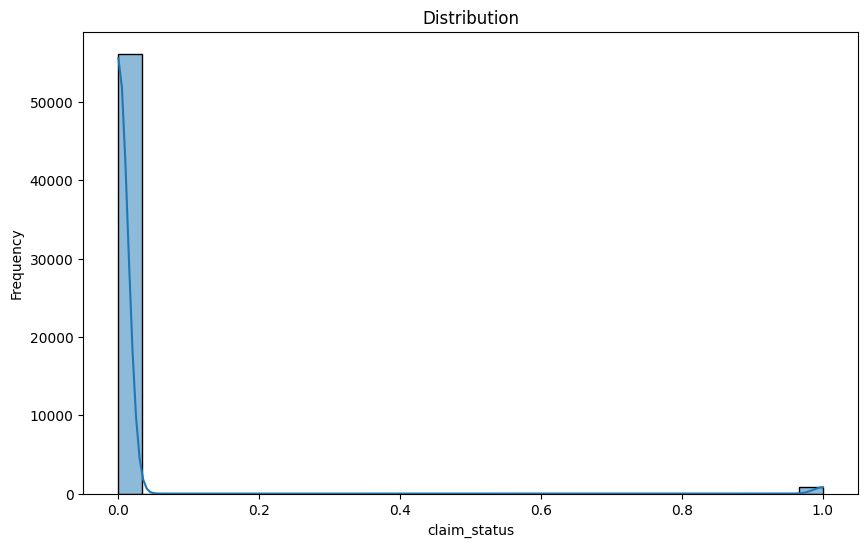

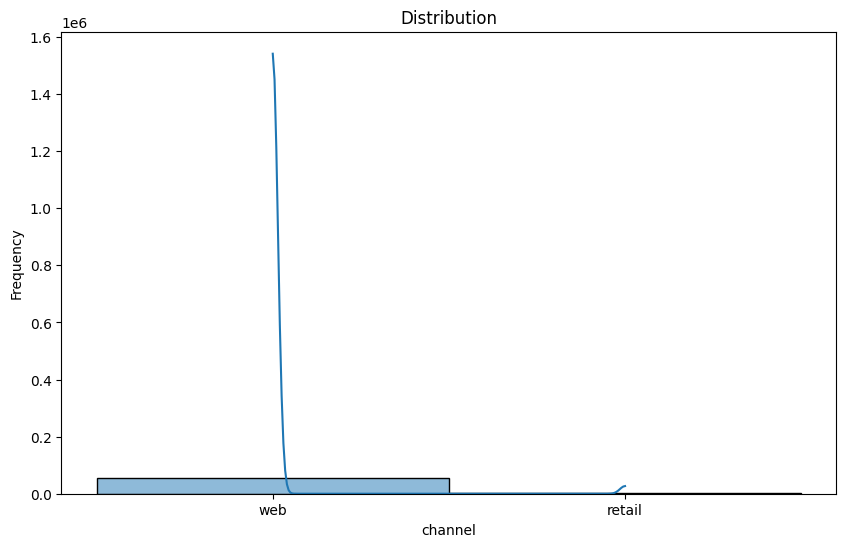

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data=INS, x= 'reward', bins=30, kde=True)
plt.title('Distribution')
plt.xlabel('reward')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=INS, x= 'revenue', bins=30, kde=True)
plt.title('Distribution')
plt.xlabel('revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=INS, x= 'customer_score', bins=30, kde=True)
plt.title('Distribution')
plt.xlabel('customer_score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=INS, x= 'claim_status', bins=30, kde=True)
plt.title('Distribution')
plt.xlabel('claim_status')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=INS, x= 'channel', bins=30, kde=True)
plt.title('Distribution')
plt.xlabel('channel')
plt.ylabel('Frequency')
plt.show()

In [28]:
# lets remove problematic variables from the dataset 
# i'm not sure abt removing 'reward','revenue' as they have some distribution still and maybe it would make sense to make then binary or maybe to combine them as they are correlated too much 

variables_nzv = INS[['channel']]

print(variables_nzv)



      channel
0         web
1         web
2         web
3         web
4         web
...       ...
56988     web
56989     web
56990     web
56991     web
56992     web

[56993 rows x 1 columns]


In [101]:
INS.drop(variables_nzv, axis = 1, inplace = True)

INS.head()


KeyError: "['channel'] not found in axis"

In [102]:
INS.head()

,reward,claim_status,person_gender,entity_type,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,0.000000,0,9b2d5b46,type_a,0,agt_0004,0.284509,50b3e71e,51,united states,105.459587,SecurePlan Flex,21
1,18.428627,0,9b2d5b46,type_a,0,agt_0001,0.207538,96d6c6df,32,spain,30.433459,DriveSafe Rental Addon,6
2,0.000000,0,9b2d5b46,type_a,1,agt_0004,0.300461,50b3e71e,38,new zealand,78.728474,TripGuard Cancel,84
3,0.000000,0,9b2d5b46,type_a,0,agt_0004,0.132404,50b3e71e,30,thailand,17.146843,TripGuard Cancel,39
4,0.000000,0,9b2d5b46,type_a,2,agt_0004,0.070443,50b3e71e,37,viet nam,10.476416,TripGuard Cancel,48


In [103]:
INS_test.drop(variables_nzv, axis = 1, inplace = True)
INS_test.head(10)

,reward,person_gender,entity_type,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,84.316320,9b2d5b46,type_a,2,agt_0001,0.009257,96d6c6df,31,ireland,-141.716239,DriveSafe Rental Addon,73
1,45.884363,9b2d5b46,type_a,0,agt_0001,0.108049,96d6c6df,29,australia,82.225268,DriveSafe Rental Addon,25
2,0.000000,9b2d5b46,type_a,2,agt_0004,0.108814,50b3e71e,26,indonesia,10.247118,TripGuard Cancel,6
3,29.363482,f67ab10a,type_b,1,agt_0002,0.215505,7b5dbb09,32,france,83.483247,TravelShield Value,73
4,12.440951,08f27188,type_b,0,agt_0005,0.194798,99ede4e4,26,singapore,46.679372,TravelShield Plus,32
5,10.554589,f67ab10a,type_a,1,agt_0015,0.318590,5d630515,59,thailand,29.677038,CruiseSafe Trip,7
6,23.032416,9b2d5b46,type_a,0,agt_0001,0.260454,96d6c6df,34,new zealand,37.670204,DriveSafe Rental Addon,71
7,0.593061,9b2d5b46,type_b,1,agt_0008,0.196252,b5e4bb23,48,singapore,2.190958,TripGuard TicketCover,3
8,6.348724,08f27188,type_b,1,agt_0002,0.190387,7b5dbb09,52,thailand,17.234293,TravelShield Basic,14
9,6.527074,08f27188,type_b,2,agt_0002,0.175124,7b5dbb09,37,indonesia,17.992485,TravelShield Basic,163


# Correlation check for numeric variables 

                        reward  claim_status  support_interactions  \
reward                1.000000      0.099609              0.020915   
claim_status          0.099609      1.000000              0.004219   
support_interactions  0.020915      0.004219              1.000000   
customer_score        0.368217      0.056318              0.010134   
person_age            0.120739     -0.011507              0.005165   
revenue               0.652891      0.134837              0.026635   
trip_length           0.356496      0.077680              0.044720   

                      customer_score  person_age   revenue  trip_length  
reward                      0.368217    0.120739  0.652891     0.356496  
claim_status                0.056318   -0.011507  0.134837     0.077680  
support_interactions        0.010134    0.005165  0.026635     0.044720  
customer_score              1.000000    0.643153  0.468854     0.201912  
person_age                  0.643153    1.000000  0.037435     0.0049

<Axes: >

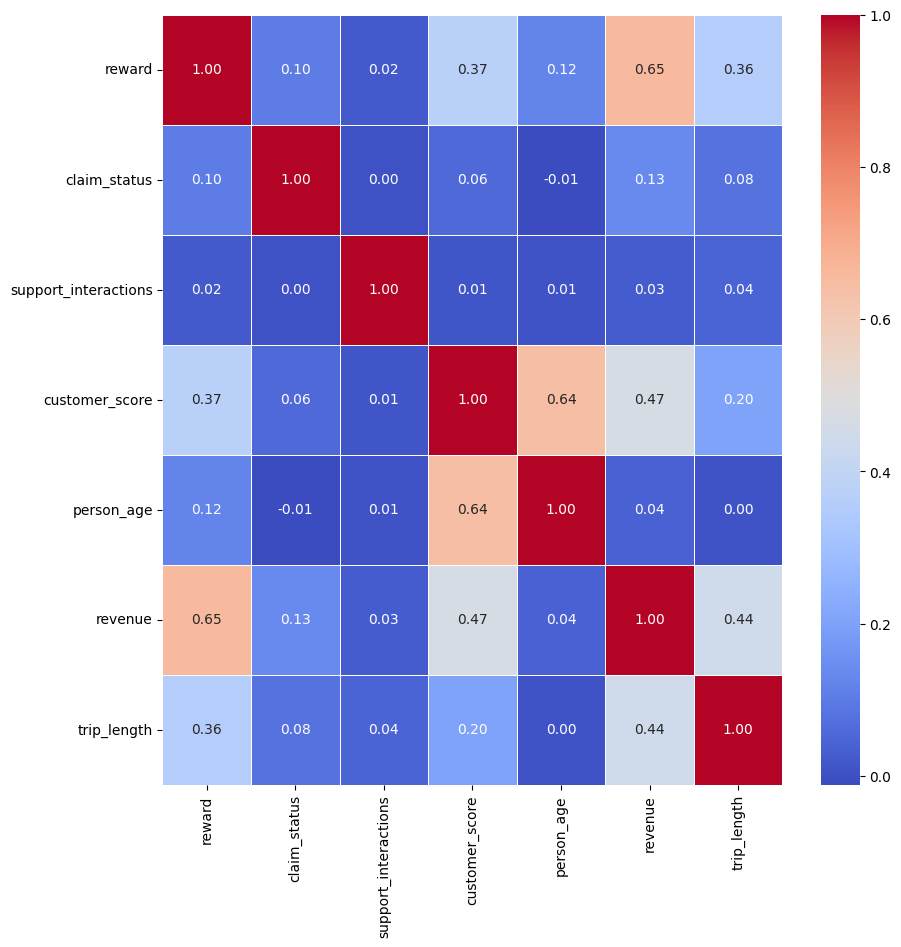

In [31]:
INS_numeric_columns = INS.select_dtypes(include=[np.number]).columns 

INS_correlations = INS[INS_numeric_columns].corr(method = 'pearson')

# Display the correlation matrix
print(INS_correlations)

plt.figure(figsize=(10, 10))

sns.heatmap(INS_correlations,
            annot = True,
            cmap = "coolwarm",
            fmt = ".2f",
            linewidths = 0.5)

customer_score & person_age: 0.64 – moderate correlation, not problematic yet.

revenue & reward: 0.65 – high-ish, but still below the 0.8 threshold.

customer_score & revenue: 0.47

All other correlations are low.



# Encoding of predictors

since looks like i have only nominal variables, **no WOE**

- WoE assumes an ordering of categories that has a monotonic relationship with the target.

- For nominal (unordered) categories, there's no natural order, so WoE can distort the data and introduce misleading patterns.

- Example: WoE might treat "Red", "Green", "Blue" as ordered in terms of risk or outcome — but those are just labels.

In [104]:
# one-hot encoding for train data

nominal_variables_for_enc = ['person_gender', 'entity_type']

# One-Hot Encode nominal variables and overwrite INS
INS_encoded = pd.get_dummies(
    INS,
    columns=nominal_variables_for_enc,
    drop_first=True,  # Reduces multicollinearity
    dtype=int         # Encodes as integers (0/1)
)



In [105]:

#one-hot encoding for test 

INS_test_encoded = pd.get_dummies(
    INS_test,
    columns=nominal_variables_for_enc,
    drop_first=True,  # Reduces multicollinearity
    dtype=int         # Encodes as integers (0/1)
)

In [106]:
INS_encoded.head()

,reward,claim_status,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length,person_gender_9b2d5b46,person_gender_f67ab10a,entity_type_type_b
0,0.000000,0,0,agt_0004,0.284509,50b3e71e,51,united states,105.459587,SecurePlan Flex,21,1,0,0
1,18.428627,0,0,agt_0001,0.207538,96d6c6df,32,spain,30.433459,DriveSafe Rental Addon,6,1,0,0
2,0.000000,0,1,agt_0004,0.300461,50b3e71e,38,new zealand,78.728474,TripGuard Cancel,84,1,0,0
3,0.000000,0,0,agt_0004,0.132404,50b3e71e,30,thailand,17.146843,TripGuard Cancel,39,1,0,0
4,0.000000,0,2,agt_0004,0.070443,50b3e71e,37,viet nam,10.476416,TripGuard Cancel,48,1,0,0


In [107]:
INS_test_encoded.head()

,reward,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length,person_gender_9b2d5b46,person_gender_f67ab10a,entity_type_type_b
0,84.316320,2,agt_0001,0.009257,96d6c6df,31,ireland,-141.716239,DriveSafe Rental Addon,73,1,0,0
1,45.884363,0,agt_0001,0.108049,96d6c6df,29,australia,82.225268,DriveSafe Rental Addon,25,1,0,0
2,0.000000,2,agt_0004,0.108814,50b3e71e,26,indonesia,10.247118,TripGuard Cancel,6,1,0,0
3,29.363482,1,agt_0002,0.215505,7b5dbb09,32,france,83.483247,TravelShield Value,73,0,1,1
4,12.440951,0,agt_0005,0.194798,99ede4e4,26,singapore,46.679372,TravelShield Plus,32,0,0,1


In [108]:
#frequency encoding 

cols_to_encode = ['location', 'agent_id', 'entity_a', 'product_id']

# Calculate frequencies and replace values for train 
for col in cols_to_encode:
    freq = INS_encoded[col].value_counts().to_dict()  # Get counts for each category
    INS_encoded[f'{col}_freq'] = INS_encoded[col].map(freq)   # Map counts to new column
    
INS_encoded.drop(cols_to_encode, axis=1, inplace=True)  # Remove original categorical columns




In [109]:
INS_encoded.head()

,reward,claim_status,support_interactions,customer_score,person_age,revenue,trip_length,person_gender_9b2d5b46,person_gender_f67ab10a,entity_type_type_b,location_freq,agent_id_freq,entity_a_freq,product_id_freq
0,0.000000,0,0,0.284509,51,105.459587,21,1,0,0,2299,31663,31663,11872
1,18.428627,0,0,0.207538,32,30.433459,6,1,0,0,308,7713,7713,7713
2,0.000000,0,1,0.300461,38,78.728474,84,1,0,0,482,31663,31663,16795
3,0.000000,0,0,0.132404,30,17.146843,39,1,0,0,5303,31663,31663,16795
4,0.000000,0,2,0.070443,37,10.476416,48,1,0,0,1482,31663,31663,16795


In [110]:
# Calculate frequencies and replace values for test 
for cols in cols_to_encode:
    freq = INS_test_encoded[cols].value_counts().to_dict()  # Get counts for each category
    INS_test_encoded[f'{cols}_freq'] = INS_test_encoded[cols].map(freq)   # Map counts to new column
    
INS_test_encoded.drop(cols_to_encode, axis=1, inplace=True)  # Remove original categorical columns

In [111]:
INS_test_encoded.head()

,reward,support_interactions,customer_score,person_age,revenue,trip_length,person_gender_9b2d5b46,person_gender_f67ab10a,entity_type_type_b,location_freq,agent_id_freq,entity_a_freq,product_id_freq
0,84.316320,2,0.009257,31,-141.716239,73,1,0,0,12,867,867,867
1,45.884363,0,0.108049,29,82.225268,25,1,0,0,371,867,867,867
2,0.000000,2,0.108814,26,10.247118,6,1,0,0,345,3456,3456,1835
3,29.363482,1,0.215505,32,83.483247,73,0,1,1,51,646,646,283
4,12.440951,0,0.194798,26,46.679372,32,0,0,1,1313,823,823,218


# Standartization of what is not binary 


In [112]:
print(INS_encoded.columns.tolist())

['reward', 'claim_status', 'person_gender', 'entity_type', 'support_interactions', 'agent_id', 'customer_score', 'entity_a', 'person_age', 'location', 'revenue', 'product_id', 'trip_length']


In [113]:
numerical_cols = [
    'reward', 'support_interactions', 'customer_score', 'person_age',
    'revenue', 'trip_length', 'location_freq', 'agent_id_freq',
    'entity_a_freq', 'product_id_freq'
]


scaler = StandardScaler()
INS_encoded[numerical_cols] = scaler.fit_transform(INS_encoded[numerical_cols])

In [114]:
# Transform TEST data
INS_test_encoded[numerical_cols] = scaler.transform(INS_test_encoded[numerical_cols])



In [116]:
INS_encoded.head()

,reward,claim_status,support_interactions,customer_score,person_age,revenue,trip_length,person_gender_9b2d5b46,person_gender_f67ab10a,entity_type_type_b,location_freq,agent_id_freq,entity_a_freq,product_id_freq
0,-0.494922,0,-1.185067,1.177678,0.896806,1.327408,-0.286188,1,0,0,-0.606461,0.886359,0.886359,0.405356
1,0.436242,0,-1.185067,0.223184,-0.610733,-0.211628,-0.438227,1,0,0,-1.099834,-0.968711,-0.968711,-0.308640
2,-0.494922,0,-0.101767,1.375492,-0.134668,0.779063,0.352378,1,0,0,-1.056716,0.886359,0.886359,1.250511
3,-0.494922,0,-1.185067,-0.708528,-0.769421,-0.484181,-0.103740,1,0,0,0.137935,0.886359,0.886359,1.250511
4,-0.494922,0,0.981534,-1.476895,-0.214012,-0.621013,-0.012517,1,0,0,-0.808915,0.886359,0.886359,1.250511


In [117]:
INS_test_encoded.head()

,reward,support_interactions,customer_score,person_age,revenue,trip_length,person_gender_9b2d5b46,person_gender_f67ab10a,entity_type_type_b,location_freq,agent_id_freq,entity_a_freq,product_id_freq
0,3.765426,0.981534,-2.235636,-0.690077,-3.742991,0.240882,1,0,0,-1.173183,-1.498974,-1.498974,-1.483926
1,1.823530,-1.185067,-1.010549,-0.848765,0.850794,-0.245644,1,0,0,-1.084222,-1.498974,-1.498974,-1.483926
2,-0.494922,0.981534,-1.001067,-1.086798,-0.625717,-0.438227,1,0,0,-1.090665,-1.298441,-1.298441,-1.317744
3,0.988761,-0.101767,0.321980,-0.610733,0.876600,0.240882,0,1,1,-1.163519,-1.516092,-1.516092,-1.584184
4,0.133696,-1.185067,0.065199,-1.086798,0.121630,-0.174692,0,0,1,-0.850793,-1.502382,-1.502382,-1.595343


# Correlation check after features transformation 

                          reward  claim_status  support_interactions  \
reward                  1.000000      0.099609              0.020915   
claim_status            0.099609      1.000000              0.004219   
support_interactions    0.020915      0.004219              1.000000   
customer_score          0.368217      0.056318              0.010134   
person_age              0.120739     -0.011507              0.005165   
revenue                 0.652891      0.134837              0.026635   
trip_length             0.356496      0.077680              0.044720   
person_gender_9b2d5b46 -0.279630     -0.109433             -0.005718   
person_gender_f67ab10a  0.183492      0.083986             -0.000263   
entity_type_type_b      0.178973      0.100194              0.004829   
location_freq           0.046622      0.106809              0.006236   
agent_id_freq          -0.535300     -0.078225             -0.005182   
entity_a_freq          -0.535300     -0.078225             -0.00

<Axes: >

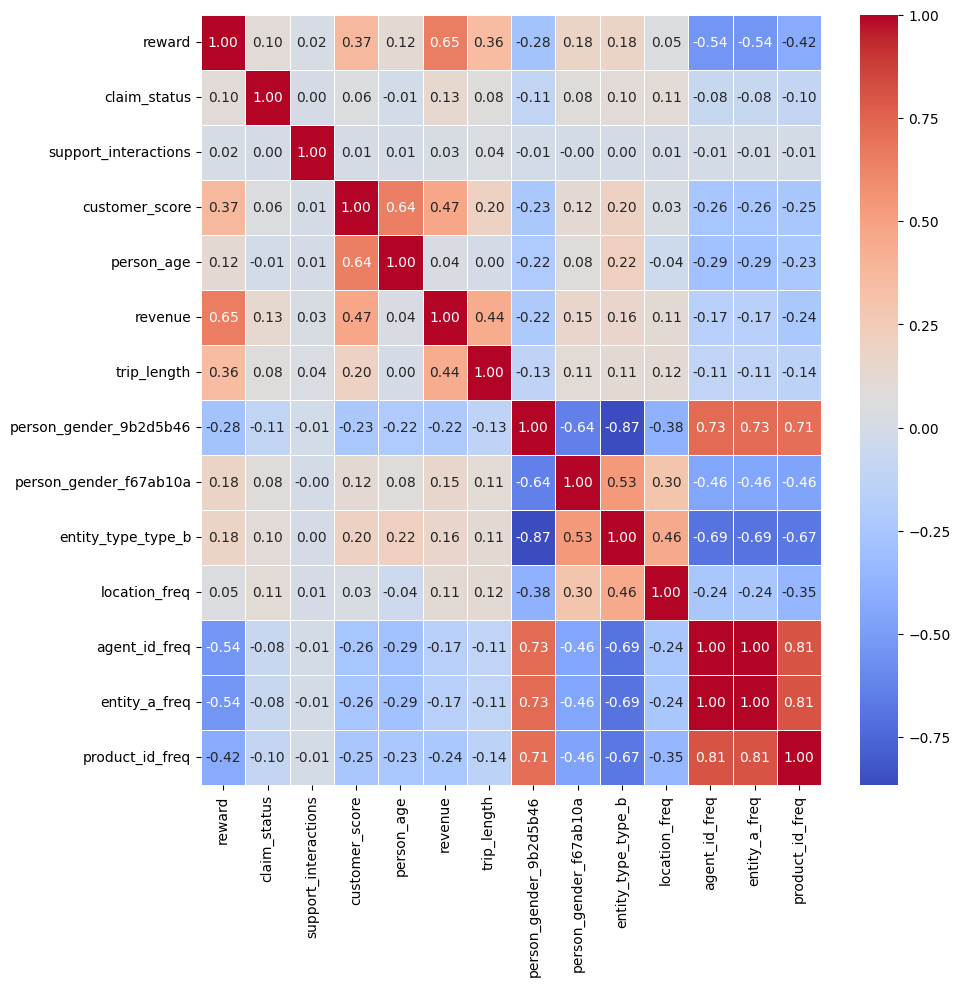

In [60]:

INS_cor  = INS_encoded.corr(method = 'pearson')

# Display the correlation matrix
print(INS_cor)

plt.figure(figsize=(10, 10))

sns.heatmap(INS_cor,
            annot = True,
            cmap = "coolwarm",
            fmt = ".2f",
            linewidths = 0.5)

we can for sure merge agent_id_freq with entity_a_freq as they correlate fully 

In [118]:
INS_encoded.drop('entity_a_freq', axis=1, inplace=True)

In [119]:
INS_test_encoded.drop('entity_a_freq', axis=1, inplace=True)

In [78]:
print(X)

         reward  support_interactions  customer_score  person_age   revenue  \
0     -0.494922             -1.185067        1.177678    0.896806  1.327408   
1      0.436242             -1.185067        0.223184   -0.610733 -0.211628   
2     -0.494922             -0.101767        1.375492   -0.134668  0.779063   
3     -0.494922             -1.185067       -0.708528   -0.769421 -0.484181   
4     -0.494922              0.981534       -1.476895   -0.214012 -0.621013   
...         ...                   ...             ...         ...       ...   
56988 -0.494922              0.981534        0.326397   -0.214012  0.164340   
56989 -0.494922             -0.101767       -0.539029   -0.293356 -0.562708   
56990 -0.494922             -1.185067       -0.789068   -0.214012 -0.431879   
56991 -0.494922             -1.185067       -0.441468   -0.214012 -0.638763   
56992 -0.437834             -1.185067        0.487515    0.817462 -0.748784   

       trip_length  person_gender_9b2d5b46  person_

# SVM with balancing data

In [120]:
from sklearn.svm import SVC

# Step 1: Separate features (X) and target (y)
X = INS_encoded.drop('claim_status', axis=1)  # All columns EXCEPT the target
y = INS_encoded['claim_status']               # Only the target column


# Step 2: Initialize SVM (no target mentioned here!)
model = SVC(
    kernel='rbf',
    class_weight={0: 1, 1: 67},  # Weights based on your y's class frequencies
    random_state=42
)

# Step 3: NOW the model learns that y is the target
model.fit(X, y)  # <-- Here, SVM discovers that y = claim_status

SVC(class_weight={0: 1, 1: 67}, random_state=42)

In [121]:
# Step 3: Directly use it for prediction (no scaling needed)
INS_test_encoded['svm_predictions'] = model.predict(INS_test_encoded)

# Step 4: Verify predictions against actual claim_status
print(INS_test_encoded[['claim_status', 'svm_predictions']].head())



KeyError: "['claim_status'] not in index"

maybe this ????

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'SVM': SVC(class_weight='balanced', kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(class_weight='balanced')
}

# Create evaluation pipeline
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    
    score = balanced_accuracy_score(y_val, y_pred)
    print(f"{name}: Balanced Accuracy = {score:.4f}")

In [51]:
print(INS['claim_status'].value_counts())

claim_status
0    56159
1      834
Name: count, dtype: int64


# Distribution of the dependent variable

Lets check the distribution (histogram) of the dependent variable "claim_status".

Compare how it looks after log transformation. Lets take log(x + 1) in case of zeroes

<Axes: xlabel='claim_status', ylabel='Count'>

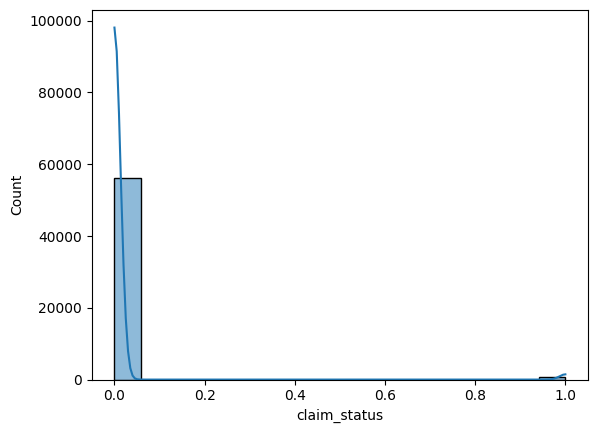

In [73]:
# Original distribution
sns.histplot(INS["claim_status"], kde = True)

# clearly right-skewed

# Levels of numerical variables

Lets check how many unique values does each numeric variable have (qualitative variables can also be stored as numeric - e.g. as 0/1).

We will print frequency tables for those that have only 3-5 levels.

How it may influence the data preparation for modelling?


In [90]:
numeric_variables = INS.select_dtypes(include=[np.number]).columns

for col in numeric_variables:
    unique_vals = INS[col].unique()
    n_unique = len(unique_vals)
    print(f"Column '{col}' has {n_unique} unique values.")

    # If a variable has no more than 5 unique values, print a frequency table
    if n_unique <= 5:
        print(f"Frequency table for '{col}':")
        print(INS[col].value_counts(dropna = False), "\n")

Column 'claim_status' has 2 unique values.
Frequency table for 'claim_status':
claim_status
0    56159
1      834
Name: count, dtype: int64 

Column 'support_interactions' has 7 unique values.
Column 'person_age' has 74 unique values.
Column 'trip_length' has 448 unique values.


`Bsmt_Full_Bath`, `Bsmt_Half_Bath`, `Full_Bath`, `Half_Bath`, `Kitchen_AbvGr`, `Fireplaces`, `Garage_Cars` are in fact counts with just few levels.

Lets keep them as numeric variables not to increase the number of data dimensions. Alternatively we may consider **combining some levels** (e.g. into 0, 1 vs rest) and apply one-hot encoding.


`Year_Sold` cannot be one-hot-encoded as its values are different in train and test samples - we keep it also as a numeric variable

# Levels of ordinal variables

Lets check how many unique values does each ORDINAL variable have.

We will print frequency tables for them and think how it may influence the data preparation for modelling


# Encoding of categorical predictors

Most of machine learning algorithms like Linear Regression, Neural Networks, SVMs, KNN, etc., aren’t designed to process text-based categorical data directly. So, it’s crucial to transform categorical data into a numerical form, a process known as data encoding.

Notably, some tree-based ML algorithms like Decision Trees and Random Forests can handle categorical data natively, limiting the need for encoding. However, for most other algorithms, encoding is a vital preprocessing step.

Lets apply **ordinal encoding** on all ordinal predictors and **one-hot encoding** on all nominal predictors

## Encoding **ordinal** variables

Ordinal encoding is appropriate when the categories have a natural ordering or relationship with each other, such as in the case of ordinal variables like "small," "medium," and "large." In these cases, the integer values (0, 1, ...) assigned to the categories should reflect the ordering of the categories.

In [23]:
# Lets create a list of variables to include in the ordinal encoder

ordinal_variables_to_transform = ['Lot_Shape', 'Land_Slope', 'Overall_Qual', 'Overall_Cond',
                                  'Exter_Qual', 'Exter_Cond', 'Heating_QC', 'Kitchen_Qual',
                                  'Bsmt_Qual', 'Bsmt_Cond', 'Fireplace_Qu', 'Garage_Qual',
                                  'Garage_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2',
                                  'Electrical', 'Garage_Finish', 'Paved_Drive', 'Fence']

# For each of them we need to define a CORRECT order (based on the data description file)

Lot_Shape_order = ['Regular', 'Slightly_Irregular', 'Moderately_Irregular','Irregular']
Land_Slope_order = ['Gtl', 'Mod', 'Sev']
# for two variables: Overall_Qual and Overall_Comd
Overall_Qual_Cond_order =  ['Very_Excellent', 'Excellent', 'Very_Good', 'Good', 'Above_Average', 'Average',
                            'Below_Average', 'Fair','Poor', 'Very_Poor']
# for Exter_Qual, Exter_Cond, Heating_QC, Kitchen_Qual
Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor']
Bsmt_Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Basement']
Fireplace_Qu_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Fireplace']
Garage_Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Garage']
Bsmt_Exposure_order = ['Gd', 'Av', 'Mn', 'No', 'No_Basement']
BsmtFin_Type_1_2_order = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'No_Basement']
Electrical_order = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']
Garage_Finish_order = ['Fin', 'RFn', 'Unf', 'No_Garage']
Paved_Drive_order = ['Paved', 'Partial_Pavement', 'Dirt_Gravel' ]
Fence_order = ['Good_Privacy', 'Minimum_Privacy', 'Good_Wood', 'Minimum_Wood_Wire', 'No_Fence']


In [24]:
# then we initialize OrdinalEncoder providing a list of categories for each of the variables which will be transformed

# if the argument categories= is an array, it has to be of shape (n_features,)

# we put the list in the same order as in 'ordinal_variables_to_transform'

encoder_ord = OrdinalEncoder(categories = [Lot_Shape_order,         # Lot_Shape
                                           Land_Slope_order,        # Land_Slope
                                           Overall_Qual_Cond_order, # Overall_Qual
                                           Overall_Qual_Cond_order, # Overall_Cond
                                           Qual_Cond_order,         # Exter_Qual
                                           Qual_Cond_order,         # Exter_Cond
                                           Qual_Cond_order,         # Heating_QC
                                           Qual_Cond_order,         # Kitchen_Qual
                                           Bsmt_Qual_Cond_order,    # Bsmt_Qual
                                           Bsmt_Qual_Cond_order,    # Bsmt_Cond
                                           Fireplace_Qu_order,      # Fireplace_Qu
                                           Garage_Qual_Cond_order,  # Garage_Qual
                                           Garage_Qual_Cond_order,  # Garage_Cond
                                           Bsmt_Exposure_order,     # Bsmt_Exposure
                                           BsmtFin_Type_1_2_order,  # BsmtFin_Type_1
                                           BsmtFin_Type_1_2_order,  # BsmtFin_Type_2
                                           Electrical_order,        # Electrical
                                           Garage_Finish_order,     # Garage_Finish
                                           Paved_Drive_order,       # Paved_Drive
                                           Fence_order],            # Fence
                              handle_unknown = 'use_encoded_value', # just in case any new value appears
                              unknown_value = -1)  # Encodes unknown categories as -1

In [25]:
# Apply to training data (variables in the same order as the lists of categories above)

# lets store the encoded datasets as copies of the original ones

houses_train_encoded = houses_train.copy()
houses_test_encoded = houses_test.copy()

# fit_transform() method applied on training data and transform() method on test data

# !!!!!! Using the transform method we apply the same rules defined on the training data to transform the test data.

# check for more detailed explanation of the difference between .fit_transform() and .transform()
# e.g. here https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

# houses_train.loc[:, columns] explicitly references the DataFrame slice where the assignment will occur,
# making it clear to pandas that you're modifying the original DataFrame.
# The : indicates all rows, while the list of columns specifies the exact columns to update.

houses_train_encoded.loc[:, ordinal_variables_to_transform] = encoder_ord.fit_transform(houses_train_encoded[ordinal_variables_to_transform])

# Apply transform for the test data using the same fitted encoder
houses_test_encoded.loc[:, ordinal_variables_to_transform] = encoder_ord.transform(houses_test_encoded[ordinal_variables_to_transform])

# Check the result
houses_test_encoded.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Alley,Lot_Shape,Land_Contour,Lot_Config,...,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Fence,Misc_Feature,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,526301100,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,No_Alley_Access,1.0,Lvl,Corner,...,1.0,210,62,4.0,None,5,2010,WD,Normal,215000
1,2,526350040,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,No_Alley_Access,0.0,Lvl,Inside,...,0.0,140,0,1.0,None,6,2010,WD,Normal,105000
2,3,526351010,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,No_Alley_Access,1.0,Lvl,Corner,...,0.0,393,36,4.0,Other,6,2010,WD,Normal,172000
3,4,526353030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,No_Alley_Access,0.0,Lvl,Corner,...,0.0,0,0,4.0,None,4,2010,WD,Normal,244000
4,5,527105010,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,No_Alley_Access,1.0,Lvl,Inside,...,0.0,212,34,1.0,None,3,2010,WD,Normal,189900


## Encoding **nominal** variables

One-hot encoding is appropriate when the categories do not have an intrinsic ordering or relationship with each other. This is because one-hot encoding treats each category as a separate entity with no relation to the other categories. One-hot encoding is also useful when the number of categories is relatively small, as the number of columns can become unwieldy for very large numbers of categories.

`pandas.get_dummies` is straightforward to use and it automatically converts only the listed column(s), keeping all the others untouched, but copying them into a resulting dataset.

Another approach is to use `OneHotEncoder` from the sklearn library, which is useful in machine learning tasks.

The primary difference is `pandas.get_dummies` cannot learn encodings - store the rules to apply it on another dataset; it can only perform one-hot-encoding on the dataset you pass as an input.

`sklearn.OneHotEncoder` is a class that can be saved and used to transform other incoming datasets in the future.

However, it requires more data transformations if applied out of the model pipeline.

For more details check e.g. here https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial

In [26]:
# now we transform the nominal variables

# lets exlude from the list those which had nzv
# !! variables_nzv is pandas.core.series.Series - we need a list below
nominal_variables_left = [var for var in nominal_variables if var not in variables_nzv.tolist()]

In [27]:
# and one-hot-encoding using the pandas get_dummies()
# train
houses_train_encoded = pd.get_dummies(houses_train_encoded,
                                      columns = nominal_variables_left,
                                      drop_first = True,
                                      dtype = int) # bool by default

# test
houses_test_encoded = pd.get_dummies(houses_test_encoded,
                                     columns = nominal_variables_left,
                                     drop_first = True,
                                     dtype = int)

houses_test_encoded.head()

,Order,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,...,Sale_Type_New,Sale_Type_Other,Sale_Type_WD,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Other,Sale_Condition_Partial,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl
0,1,526301100,141,31770,1.0,0.0,4.0,5.0,1960,1960,...,0,0,1,0,1,0,0,0,0,1
1,2,526350040,80,11622,0.0,0.0,5.0,4.0,1961,1961,...,0,0,1,0,1,0,0,0,0,1
2,3,526351010,81,14267,1.0,0.0,4.0,4.0,1958,1958,...,0,0,1,0,1,0,0,0,0,1
3,4,526353030,93,11160,0.0,0.0,3.0,5.0,1968,1968,...,0,0,1,0,1,0,0,0,0,1
4,5,527105010,74,13830,1.0,0.0,5.0,5.0,1997,1998,...,0,0,1,0,1,0,0,0,0,1


# Save the final data as a pickle

Lets save the final `houses_train` and `houses_test` datasets as pickles (`*.pkl`) into the `"data"` folder for further analyses.


In [28]:
# we save the data after encoding

# 'wb' stands for write in a binary mode
with open("data/houses_prepared_encoded.pkl", "wb") as f:
    pickle.dump(houses_train_encoded, f)
    pickle.dump(houses_test_encoded, f)

# but also the datasets just before encoding

with open("data/houses_prepared.pkl", "wb") as f:
    pickle.dump(houses_train, f)
    pickle.dump(houses_test, f)

# Exercises 2

## Description of `churn` dataset

Examples for classification will be based on the `churn` dataset.

The dataset includes 10127 observations and the following columns:
  
* `customer_id` - unique observation identifier
* `customer_age` - age of the customer in years
* `customer_gender` - gender of the customer
* `customer_number_of_dependents` - number of dependents on the customer
* `customer_education` - education level of the customer
* `customer_civil_status` - civil status of the customer
* `customer_salary_range` - range of the annual salary of the customer
* `customer_relationship_length` - length of customer’s relationship with bank in months
* `customer_available_credit_limit` - available limit on the customer’s credit card account
* `credit_card_classification` - classification of the card (Blue, Silver, Gold, Platinum)
* `total_products` - total number of products held by the customer in the bank
* `period_inactive` - period in the last year when customer was inactive (in months)
* `contacts_in_last_year` - number of contacts with the customer in the last year
* `credit_card_debt_balance` - total card debt balance on the credit card account
* `remaining_credit_limit` - remaining limit on the customer’s credit card account (average in last year)
* `transaction_amount_ratio` - ratio in total amount of transactions in the 4th quarter against the 1st quarter
* `total_transaction_amount` - total amount of transactions in the last year
* `total_transaction_count` - total number of transactions in the last year
* `transaction_count_ratio` - ratio in total count of transactions in the 4th quarter against the 1st quarter
* `average_utilization` - average card utilization (percentage used of total limit)
* `account_status` - customer account status: closed, open (outcome variable, only in the training sample)

## Exercise 2.1

Import the data from the file 'data/churn.csv' and check its structure.

In [ ]:
# place for solution to exercise 2.1

## Exercise 2.2

* check if there are any missing values
* show frequency tables for **categorical** columns with missing values
* if any, replace missing values in **categorical** columns with the string `unknown`.

In [ ]:
# Then we apply the train/test split - BEFORE imputation which takes into account the distribution of variables

# random split into train (70%)/test (30%) stratified by 'account_status'
churn_train, churn_test = train_test_split(
    churn,
    test_size = 0.3,
    stratify = churn['account_status'],
    random_state = 123456 # keep constant for reproducibility
)

In [ ]:
# place for solution to exercise 2.2

## Exercise 2.3

If any missings in **numerical** columns, apply the imputation with the mean, e.g. using `SimpleImputer(strategy = 'mean')` -- remember about creating the rule just on the training data


In [ ]:
# place for solution to exercise 2.3

## Exercise 2.4

Apply ordinal encoding to all **ordinal** predictors -- remember about the correct order.

In case of the existence of the `Unknown` level -- put it as the lowest value.

In [ ]:
# place for solution to exercise 2.4

## Exercise 2.5

Apply one-hot-encoding to all nominal predictors.

Make sure that for the dependent variable the resulting dummy refers to the level `acount_status = 'closed'`.

In [ ]:
# place for solution to exercise 2.5

## Exercise 2.6

Save the final train and test datasets for further steps into pickle file.

In [ ]:
# place for solution to exercise 2.6